# Week 4: Homework 1 

----------------------------------------------------
Machine Learning                      

Year 2019/2020

Estudiante: Iker Arana

----------------------------------------------------

The goal of this practice is to analyze the performance of different estimators on the Diabetes problem and we will analyze, by means of different approximations, which input features are more relevant to solve this problem. 

Note that previous week we already worked on Diabetes database, but we only used one of the input variable (BMI) to construct the regression model; in this practice we will use all the input features jointly.

To solve these notebook, complete the following sections implementing the solution that you consider most appropriate and showing the results that you find most interesting. For the evaluation of this notebook,  we will take into account the methodology used, the solution adopted, the presentation of the results and the conclusions obtained at the light of the results.


## 1. Data loading and preprocessing

Following the ML pipeline, start loading the data, creating the partitions that you consider necessary and carrying out the preprocessing that yu need.

Keep in mind that there is no single valid solution, and different reasons can lead you to make different data partitions or apply different normalizations. So **please justify the steps you are taking**.

In [0]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

(442, 10)
Numero de muestras: 442


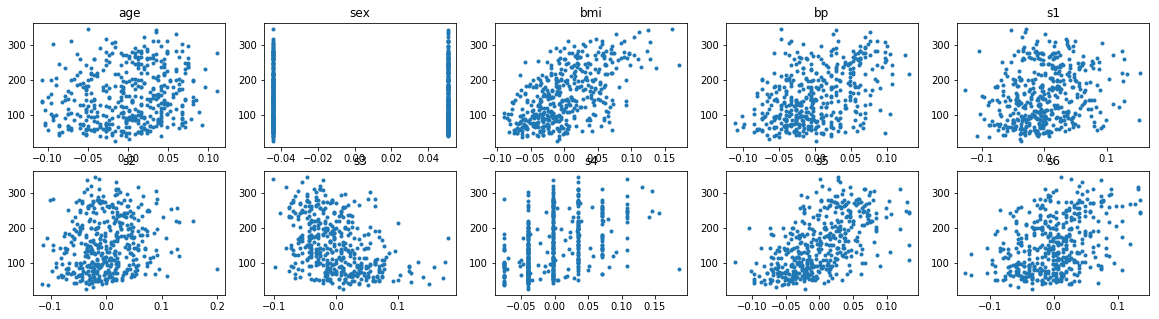

In [0]:
## 1. Data loading and preprocessing

# Include your code here (create as many cells as you need)

# caragamos los datos
diabetes = load_diabetes()

# cargamos las caracterisitcas
X = diabetes.data
#print(X)
print(X.shape) # 10 caracteristicas por 442 evidencias. Matriz 442x10


# cargamos los datos de salida
Y = diabetes.target

# cargamos los nombres de las caracteristicas
feature_names = diabetes.feature_names

# pintamos el numero de evidencias que hay en los datos
print('Numero de muestras: %s' %X.shape[0])

D = X.shape[1] # cogemos la segunda posicion de la dimension de la matriz 442

plt.figure( figsize=(20,5))

for d in range (D):
  plt.subplot(2,5,d+1)
  plt.plot(X[:,d],Y,'.',)
  plt.title(feature_names[d])



## 2. Performance evaluation 

Now, analyze the performance of different estimators to predict the diabetes progression from all the available features. 

As possible estimators to be included in this study, we will consider those studied so far: K-NN, linear regressor, polynomial regressor and their regularized versions. Please, in case these methods have any free hiperparameter, **clearly justify** the selection of their optimal values.

As you know, for the performance evaluation, we have seen several metrics. So, here, you can use one or several of them. But, regardless of the used metric, don't forget to include a final analysis comparing the performance of different methods and trying to justify the obtained results.

### 2.1 EVALUACION DE LOS DIFERENTES MODELOS

Se usaran los 3 diferentes modelos que hemos visto a lo largo de la asignatura


1.   KNN
2.   Regresion lineal
3. Regresion Polinomica



In [0]:
# GENERAMOS LA PARTICION DE LOS DATOS

# 30% test, 70% entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# pintamos las dimensiones
print('\nDatos de entrenamiento X: \n ', X_train.shape)
print('\nDatos de testeo X: \n ', X_test.shape)
print('\nDatos de entrenamiento Y: \n ', Y_train.shape)
print('\nDatos de testeo Y: \n ', Y_test.shape)

# Analyze mean and std of each feature
print('\nMedia datos de entrenamiento: ',np.mean(X_train, axis=0))
print('\nVarianza datos de entrenamiento: ',np.std(X_train, axis=0))

# Aun estando normalizados los datos, los normalizamos. Solo normalizamos los datos de entrenamiento
transformer = StandardScaler().fit(X_train)  # ajustamos el objeto StandarScaler con la media y la varianza
X_train_norm = transformer.transform(X_train) # normalizamos
X_test_norm =  transformer.transform(X_test)

# chequeamos despues de normalizar
print('\nMedia datos de entrenamiento despues de normalizar: ',np.mean(X_train_norm, axis=0))
print('\nVarianza datos de entrenamiento despues de normalizar : ',np.std(X_train_norm, axis=0))


Datos de entrenamiento X: 
  (309, 10)

Datos de testeo X: 
  (133, 10)

Datos de entrenamiento Y: 
  (309,)

Datos de testeo Y: 
  (133,)

Media datos de entrenamiento:  [-0.00068293  0.00101409 -0.00129825 -0.00011076 -0.00019301 -0.00046919
  0.00051073  0.0003037  -0.00084528 -0.00078279]

Varianza datos de entrenamiento:  [0.04829566 0.04761868 0.04828952 0.04766982 0.04737831 0.04758956
 0.04821587 0.04890978 0.04909351 0.05103602]

Media datos de entrenamiento despues de normalizar:  [-5.74872764e-18  5.31757306e-16  2.01205467e-17 -2.34440299e-17
  2.87436382e-18  3.71870819e-17 -5.28164352e-17  4.63491166e-17
 -2.29949105e-17 -2.15577286e-18]

Varianza datos de entrenamiento despues de normalizar :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
# copiamos lo datos normalizados para usar en otros modelos

#### 2.1.1 K-Nearest Neighbours
El modelo KNN es un modelo **No parametrico** ya que no usa parametros para aprender.

Para estimar la salida debemos:


1. Recibir una nueva muestra $\mathbf{x}^*$   
2. Seleccionar un valor para el parametro $K$
3. Buscar en los datos de entrenamiento los $K$ valores mas cercanos a la muestra $\mathbf{x}^*$
4. Calcular el valor estimado como la media de la variable objetivo $y$ asociada a los vecinos

\begin{align}
f(\mathbf{x}^*) =\frac{1}{K}\sum_{k\in \mathcal{S}_{K}(\mathbf{x}^*)} y^{(k)},
\end{align}


Donde $S_{k}$ es el conjunto de $K$ puntos de entrenamiento mas cercanos a $\mathbf{x}^*$.

La distancia entre puntos de suele calcular con la **distancia euclideana**: 
\begin{align}
d(\mathbf{x}^{(i)},\mathbf{x}^*) = \left|\left|\mathbf{x}^{(i)}-\mathbf{x}^*\right|\right|^2
\end{align}



 Valor minimo MSE test: 
3050.171004680067 
 Indice del valor minimo: 
 27

 Valor maximo MSE test: 
7413.609022556391 
 Indice del valor maximo: 
 0


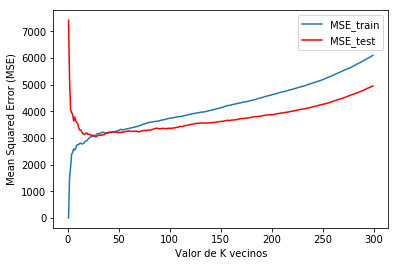

In [0]:
## KNN
from sklearn.neighbors import KNeighborsRegressor

MSE_K_train = []
MSE_K_test = []
K_values = range(1,300)
for K in K_values:
  neigh = KNeighborsRegressor(n_neighbors=K)
  neigh.fit(X_train, Y_train) 

  f_train=neigh.predict(X_train)
  MSE_K_train.append(np.mean((Y_train-f_train)**2))

  f_test=neigh.predict(X_test)
  MSE_K_test.append(np.mean((Y_test-f_test)**2))


print("\n Valor minimo MSE test: \n"+ str(min(MSE_K_test)) +" \n Indice del valor minimo: \n "+str(MSE_K_test.index(min(MSE_K_test))))
print("\n Valor maximo MSE test: \n"+str(max(MSE_K_test)) +" \n Indice del valor maximo: \n "+str(MSE_K_test.index(max(MSE_K_test))))


  
plt.figure()
plt.plot(K_values,MSE_K_train,label='MSE_train')
plt.plot(K_values,MSE_K_test,'r',label='MSE_test')
plt.xlabel('Valor de K vecinos')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


Analizando la curva de test, vemos que el error se minimiza para $K=27$ vecinos. El $MSE$ tiene un valor igual a 3050.171004680067  



##### 2.1.1.1 K-Folds Cross Validation
Utilizamos este modelo, para seleccionar el valor de $K$ que minimiza el MSE.

Para ello, sobre el conjunto de datos de entrenamiento, tenemos que generar otra particion, con un conjunto de datos de validacion

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/validation_set.png" width="70%" >

Con ello, generaremos un modelo nuevo por cada valor de $K$ y computaremos su $MSE$ segun la siguiente expresion:


$$MSE_{val}(K) = \frac{1}{N_{val}} \sum_{i=1}^{N_{val}} \left(y^{(i)}-{f_K}({\bf x}^{(i)})\right)^2$$

Despues seleccionaremos el valor de $K$ que minimiza el $MSE$ y reentrenaremos e modelo

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Parametros
# usaremos valores de K desde 1 hasta 50
K_max = 70
rang_K = np.arange(1, K_max+1)
nfold = 10

# diccinario donde guardaremos los parametros en funcion del valor de K
tuned_parameters = [{'n_neighbors': rang_K}]

# Creamos el objeto
clf_base = KNeighborsRegressor( )

# creamos el objeto sobre el que realizaremos la bsuqueda del mejor estimador en funcion a los parametros que le hemos asignado
# el parametro scoring, define el sistema de reglas que vamos a usar para evaluar las predicciones en el conjunto de datos de entrenamiento
# en este caso usaremos 'neg_mean_squared_error' --> 
# bajo la premisa de que , con la premisa de que los valores mayores son mejores que los valores menores 
#as metricsas que miden la distancia entre el modelo y los datos, como el mean_swuared_error
# devuelve el valor en negativo
clf = GridSearchCV(clf_base, tuned_parameters, cv=nfold, iid= False, scoring='neg_mean_squared_error')

# Ejecutamos el CV para ajustarlo
clf.fit(X_train, Y_train)





GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid=False, n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

### Analisis de Resultados para el CV


Resultados CV:
For K = 1, validation neg-MSE is -6068.81 (+/-967.437)%
For K = 2, validation neg-MSE is -4385.77 (+/-672.941)%
For K = 3, validation neg-MSE is -3985.99 (+/-534.359)%
For K = 4, validation neg-MSE is -3690.64 (+/-603.898)%
For K = 5, validation neg-MSE is -3501.85 (+/-541.263)%
For K = 6, validation neg-MSE is -3405.66 (+/-501.683)%
For K = 7, validation neg-MSE is -3381.25 (+/-458.872)%
For K = 8, validation neg-MSE is -3303.00 (+/-425.378)%
For K = 9, validation neg-MSE is -3328.31 (+/-438.796)%
For K = 10, validation neg-MSE is -3343.55 (+/-427.596)%
For K = 11, validation neg-MSE is -3203.65 (+/-414.765)%
For K = 12, validation neg-MSE is -3156.01 (+/-434.699)%
For K = 13, validation neg-MSE is -3168.25 (+/-403.887)%
For K = 14, validation neg-MSE is -3194.54 (+/-381.716)%
For K = 15, validation neg-MSE is -3211.71 (+/-377.744)%
For K = 16, validation neg-MSE is -3236.31 (+/-380.826)%
For K = 17, validation neg-MSE is -3254.14 (+/-384.140)%
For K = 18, validation ne

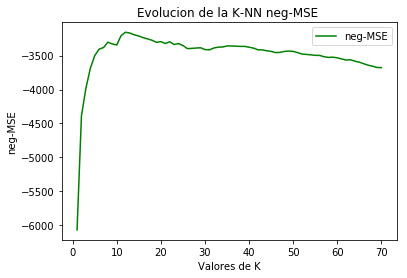

In [0]:
print("Resultados CV:")

# recogemos los diferentes parametros de validacion 
paramsFolds = clf.cv_results_['params']
meanScoreFolds = clf.cv_results_['mean_test_score']
stdScoreFolds = clf.cv_results_['std_test_score']

# pintamos los datos 
for i, K in enumerate(rang_K):
    params = paramsFolds[i]
    mean_score = meanScoreFolds[i]
    std_score = stdScoreFolds[i]
    print("For K = %d, validation neg-MSE is %2.2f (+/-%1.3f)%%" 
          % (params['n_neighbors'], mean_score, std_score / 2))

# guardamos los valores medios del test
vect_val=meanScoreFolds

# Ploting results
plt.figure()
plt.plot(rang_K,vect_val,'g', label='neg-MSE')
plt.legend()
plt.xlabel('Valores de K')
plt.ylabel('neg-MSE')
plt.title('Evolucion de la K-NN neg-MSE ')
plt.show()

In [0]:
# ASignamos el valor optimo de K que nos devuele el modelo
K_opt = clf.best_params_['n_neighbors']
print("EL valor optimo de K es de K=%d" %(K_opt))

# Seleccionamos el estimador final y calculamos su MSE
f_test = clf.best_estimator_.predict(X_test)
MSE_test = np.mean((Y_test-f_test)**2) 
print("La precison de la funcion de error MSE es de MSE=%2.2f" %(MSE_test ))

EL valor optimo de K es de K=12
La precison de la funcion de error MSE es de MSE=3294.70


### Diferentes Metricas

Finalmente vamos a hacer una comparativa en funcion a las diferentes funciones de evaluacion que nos ofrece SkLearn. Usaremos las siguientes:
* Mean Square Error (MSE)
$$MSE = \frac{1}{N} \sum_{i=1}^{N} \left(y^{(i)}-f({\bf x}^{(i)})\right)^2$$

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{N} \sum_{i=1}^{N} \left|y^{(i)}-f({\bf x}^{(i)})\right|$$

* R2-score (R2)
$$R2 =  1- \frac{ \sum_{i=1}^{N} \left(y^{(i)}-f({\bf x}^{(i)})\right)^2}{\sum_{i=1}^{N} \left(y^{(i)}-\bar{y}\right)^2}$$

In [0]:
from sklearn import metrics
from sklearn import neighbors

# Retrain the KNN model and compute the test output
## (this is not neeeded since it is already done in the previous cell)
clf = neighbors.KNeighborsRegressor(K_opt)
clf.fit(X_train, Y_train)
f_test = clf.predict(X_test)

# Compute the performance metrics
MAE = metrics.mean_absolute_error(Y_test, f_test) 
MSE = metrics.mean_squared_error(Y_test, f_test) 
R2score = metrics.r2_score(Y_test, f_test) 

print("Los valores del test de evaluacion para las diferentes metricas son: ")
print("\n MAE="+str(MAE))
print("\n MSE="+str(MSE))
print("\n R2score="+str(R2score))

Los valores del test de evaluacion para las diferentes metricas son: 

 MAE=46.21929824561403

 MSE=3294.695279866333

 R2score=0.35417018305023074


#### 2.1.2 REGRESION LINEAL

Tenemos un dataset de $N$ entradas con la forma:
 
  
*   $(\mathbf{x}^{(i)},y^{(i)})$
*   $\mathbf{x}^{(i)}\in\mathbb{R}^D$
*   $y^{(i)}\in\mathbb{R}$

Cada entrada de datos es un vector de $D$ elementos definido por $\mathbf{x}_e=[x_1, \ldots, x_D]$, donde cada valor es el correspondiente a una caracteristica.

Se ajustara un modelo lineal definido por:

$$f(\mathbf{x}) =  w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_D x_D, $$

Donde $w_0$ es el **intercept** y recoge el valor **bias** de $y$

De aqui en adelante consideraremos una version de los datos en la que añadiremos una primera entrada con valor 1:

$$\mathbf{x}_e=[1, x_1, \ldots, x_D]$$

Asi que podriamos simplificar el modelo como:
$$f(\mathbf{x}) = \mathbf{w}^T\mathbf{x}_e$$

Este modelo lo llamaremos **regresion lineal** ya que aproxima la $y$ como una funcion que es una combinacion lineal de sus caracteristicas de entrada.

Para ajustar  el parametro $w$ hay que definir una funcion de coste que penalice la cantidad de errores que comete el modelo al estimar. En este caso usaremos la funcion **average training squared error** definida por :

$$J_{train}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}_e^{(i)})^2$$

De esta manera, buscaremos los valores que la minimizan:
$$\mathbf{w}^* = \arg \min_{\mathbf{w}} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}_e^{(i)})^2 $$

Debido a las dimensiones de $w$, $\mathbf{w}^*$ se define como **least square** o **normal equation**:
$$\mathbf{w}^* = (\mathbf{X}_e^T\mathbf{X}_e)^{-1}\mathbf{X}_e^T\mathbf{y},$$

Donde:


- ${\mathbf{X}_e}_{N\times (D+1)}$ es la version extendida de la matriz de entrada de datos
- $\mathbf{y}_{(N\times 1)}$ es el vwctor de datos de entrenamiento incluyendo los datos de salida
- $ (\mathbf{X}_e^T\mathbf{X}_e)^{-1}\mathbf{X}_e$ es la **Moore-Penrose inverse** o pseudoinversa de $\mathbf{X}_e$.



In [0]:
## LINEAR REGRESION

# creamos la version extendida de los datos
Ntr = X_train.shape[0]
Ntst = X_test.shape[0]
X_train_e = np.concatenate((np.ones((Ntr,1)), X_train) , axis=1)
X_test_e = np.concatenate((np.ones((Ntst,1)), X_test) , axis=1)

# pintamos el tamaño de la matriz de datos
print("Dimensiones datos entrenamiento \n",X_train_e.shape)
print("Dimensiones datos testeo \n",X_test_e.shape)



Dimensiones datos entrenamiento 
 (309, 11)
Dimensiones datos testeo 
 (133, 11)


#### Solucion basada en Least Square
$$\mathbf{w}^* = (\mathbf{X}_e^T\mathbf{X}_e)^{-1}\mathbf{X}_e^T\mathbf{y},$$


In [0]:
# implementamos la ecuacion de arriba usando LS (lstsq)
w_star= np.linalg.lstsq(X_train_e, Y_train, rcond=None )[0]
print(w_star)
print("\n Las dimensiones de W^* son: ",w_star.shape)

[ 153.71914541  -52.46990775 -193.51064552  579.4827762   272.46404234
 -504.72401371  241.68441866  -69.73618783   86.62018451  721.95580222
   26.77887028]

 Las dimensiones de W^* son:  (11,)


Se computa la $\mathbf{w}^*$ usando la funcion **lsqt** ya que esta resuelve el problema LS de forma mas eficiente.

Finalmente, usamos el modelo pre entrenado para evaluar como se comporta con los datos de test

In [0]:
f_test=X_test_e @ w_star
MSE_test = np.mean((Y_test-f_test)**2)
print("\n El valor de la MSE para el modelo de regresion lineal es de: ",MSE_test)


 El valor de la MSE para el modelo de regresion lineal es de:  3097.1461383877945


En el modelo KNN la precison de la funcion de error MSE es de MSE=3294.70 en este caso usando la misma funcion de evaluacion de coste, obtenemos un valor para la regresion lineal de MSE=3097.1461383877945.

PAra este modelo en concreto no se grafica la funcion, ya que hemos implementado el modelo para las 10 caracteristicas del dataset y hemos añadido el vector de 1s como caracteristica numero 11

#### 2.1.3 REGRESION POLINOMICA

En este caso intentaremos resolver el problema usando un modelo de regresion polinomica basado en la solucion **least square** al igual que antes. Se intentara ver si el nuevo modelo se ajusta mejor a las caracteristicas del conjunto de datos usando un polinomio de grado $D$ en vez de una solucion lineal.

Como hemos visto, las caracteristicas pueden ser una transformacion lineal de una entrada dada, pero, podemos intentar predecir sobre el mismo conjunto de datos, usando una matriz con todas las caracteristicas.

Asumimos que estamos aproximando una funcion $f(\mathbf{x})$ con un polinomio de grado $D$:

Objetivo: buscar una $\mathbf{w}\in\mathbb{R}^{D+1}$ que satisfaga $$ f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} $$

En la siguiente celda se implementacion la funcion learnPolyLR de los apuntes. Dicha funcion, entrena un modelo de regresion polinomica y devuelve los pesos $w$ del modelo y el error $MSE$


In [0]:
## Implementacion de la funcion learnPolyLR que entrena un modelo de regresion polinomica y devuelve los pesos w del modelo y el error MSE 
from sklearn.preprocessing import PolynomialFeatures

def learnPolyLR(X_train, Y_train, X_test, Y_test, n_degree, addPlot=True):
  
  # Create polynomial version of training and test data (it includes the bias)
  polynomial_features = PolynomialFeatures(degree=n_degree,include_bias=True)
  
  X_train_pol = polynomial_features.fit_transform(X_train)
  X_test_pol = polynomial_features.transform(X_test)


  # Data normalization
  transformer = StandardScaler().fit(X_train_pol[:,1:])  # fit() learns mean and std
  # The first column is the vector of ones, we do not normalize it!!!
  X_train_pol[:,1:] = transformer.transform(X_train_pol[:,1:])
  X_test_pol[:,1:] =  transformer.transform(X_test_pol[:,1:])

  # Compute LS solution
  w_star = np.linalg.lstsq(X_train_pol, Y_train, rcond=None )[0]
  
  # Evaluate train error
  f_tr =X_train_pol @ w_star
  MSE_train = np.mean((Y_train-f_tr)**2)
  
  # Evaluate test error
  f_test=X_test_pol @ w_star
  MSE_test = np.mean((Y_test-f_test)**2)
  
  if addPlot:
    X_min = np.min(X_train)
    X_max = np.max(X_train)
    X_plot = np.arange (X_min,X_max,0.001)[:,np.newaxis] # This is not data! Just to visualize the polynomial curve

    X_plot_pol = polynomial_features.transform(X_plot)
    
    # Data normalization
    X_plot_pol[:,1:] =  transformer.transform(X_plot_pol[:,1:])

    # Compute the regression curve output
    f_plot= X_plot_pol @ w_star

    # Plot the regression polynomial
    plt.figure()
    plt.plot(X_plot,f_plot)
    plt.plot(X_train, Y_train, '.r')
    plt.ylim(-400,400)

  return w_star, MSE_train, MSE_test


In [0]:
type(w_star)

numpy.ndarray

In [0]:
# creamos un vector con valores de 1-9
grados = np.arange(1,10,1)

# lista para guardar los valores MSE
MSE_diferentes_grados = []
LS_diferentes_grados = []

for grado in grados:
  # en este caso, llamamos a la funcion pasandole el parametro addPlot con valor false, para que no intente pintar la regresion ya que tenemos 11 dimensiones
  w_star, MSE_train, MSE_test = learnPolyLR(X_train, Y_train, X_test, Y_test, grado, addPlot=False)
  
  # guardamos los valores MSE y la media de los valores LS
  MSE_diferentes_grados.append(MSE_test)  
  LS_diferentes_grados.append(np.mean(w_star))
  print("\n Media de los valores LS: ",LS_diferentes_grados[grado-1])
  print("\n La solucion LS para un polinomio de grado: " +str(grado)+" es de: "+str(w_star))
  print("\n El valor de la funcion MSE para un polinomio de grado: " +str(grado)+" es de: "+str(MSE_test))


 Media de los valores LS:  18.783192284167793

 La solucion LS para un polinomio de grado: 1 es de: [152.1197411   -2.53406903  -9.21472139  27.98294725  12.98831199
 -23.9129686   11.5016562   -3.36239068   4.23657382  35.44334754
   1.36668693]

 El valor de la funcion MSE para un polinomio de grado: 1 es de: 3097.1461383877986

 Media de los valores LS:  4.56077452460655

 La solucion LS para un polinomio de grado: 2 es de: [ 1.52119741e+02  1.07016235e+00 -4.60256103e+00  2.66014922e+01
  1.22709323e+01  4.72386307e+02 -4.23935235e+02 -1.91011926e+02
  4.11254860e+00 -1.21893541e+02 -2.63482019e+00  3.37139424e+00
  1.10567948e+01  2.77513541e-01  7.08542915e-01 -2.01669871e+01
 -3.80753206e-01  1.91173402e+01  1.57877348e+01  1.31435026e+01
  3.75464937e+00 -4.60256103e+00  4.69530812e+00  6.47360521e+00
  3.84838759e+01 -3.14955606e+01 -8.76571360e+00 -1.47111900e+00
 -1.64907301e+01 -1.48868980e+00  2.47305334e-01  6.11203530e+00
 -8.12483088e+00 -1.62807418e+00  7.63659127e+00

In [0]:
# buscamos el valor minimo de la media de LS y el MSE
indice_minimo_MSE = MSE_diferentes_grados.index(min(MSE_diferentes_grados))
minimo_MSE = min(MSE_diferentes_grados)
print("\n Los valores de la MSE para los diferentes grados del polinomio son de : \n", MSE_diferentes_grados)
print("\n El valor minimo de la funcion MSE es de : ",minimo_MSE," es para un polinomio de grado : \n ", indice_minimo_MSE+1)



 Los valores de la MSE para los diferentes grados del polinomio son de : 
 [3097.1461383877986, 3952.1725479269257, 999497.8619569474, 89027.1104584803, 45664.16486231346, 74760.78150437055, 81500.91248497846, 129296.6391417104, 155657.9674082646]

 El valor minimo de la funcion MSE es de :  3097.1461383877986  es para un polinomio de grado : 
  1


In [0]:
# diferencia entre MSE de la regresion lineal y polinomica
MSEdif=3097.1461383877945-3097.1461383877986
print(abs(MSEdif))

4.092726157978177e-12


###Valor de la funcion MSE en funcion del modelo empleado:


*   Modelo = **KNN** valor de la $MSE=3294.70$ 
*   Modelo = **Regresion Lineal** valor de la $MSE=3097.1461383877945$ 
*   Modelo = **Regresion Polinomica** valor de la $MSE=3097.1461383877986$. Para un polinomio de grado $D=1$


En este caso, podemos observar que los modelos **regresion lineal** y **regresion polinomica** tienen un valor de $MSE$ practicamente igual (la diferencia es de 4.092726157978177e-12). En otras palabras, los valores de la funcion $MSE$ son iguales dado que un polinomio de grado $D=1$ es una regresion lineal.

Como se puede observar, a medida que se ha ido incrementando el grado del polinomio para el ultimo modelo, el valor de la funcion $MSE$ ha crecido de manera directamente proporcional a el (a medida que aumentaba el grado, aumentaba el valor de la $MSE$). Esto es debido a que hay un **sobreajuste** o **overfitting**, ya que la complejidad del problema parece ser que no requiere de un modelo mas sofisticado que una regresion lineal. 

En el supuesto caso de que se probaran mas modelos, como puede ser una Red Neuronal o un SVM, ambos modelos mas complejos que la regresion lineal, posiblemente, se llegaria a una conclusion similar. Seguramente en funcion de como ajustasemos los parametros de dicho modelo se volveria a producir un sobre ajuste y el modelo mas optimo seria el mas sencillo.



# 2.2 VERSIONES REGULARIZADAS
En este tipo de metodos, se combina la flexibilidad de un modelo complejo con una funcion de penalizacion que previene usar coeficientes muy altos para que el modelo converja. Es decir, usamos las regularizaciones en modelos no lineales (polinomiales) para penalizar el crecimiento de los parametros $\mathbf{w}$ y evitar que el modelo sobreajuste.

Se usaran las 3 diferentes versiones que hemos visto en la asignatura 


1.   L2
2.   L1
3.   Lasso

### 2.2.1 L2 Ridge Regression

La regularizacion mas comoda de usar es la $L_2$ o **Ridge Regression**, que viene definida por:

$$\mathbf{w}_\lambda = \arg \min_{\mathbf{w}} \frac{1}{N} \left[\sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)})^2 + \lambda \sum_{j=1}^{D} {w}_j^2\right],$$

Con el **intercept** $w_0$ penalizariamos mas los errores mas grandes. Este parametro es practicamente recoge la media de $y$

$\lambda$ es basicamente el parametro de regularizacion del modelo. Este parametro debemos aprenderlo de los datos, creando un buen balance entre el parametro y nuestros datos.

Un aspecto muy positivo de esta regularizacion es que no cambia la convexidad del modelo, mateniendose la ecuacion para los parametros $w$. La unica variacion en la ecuacion es que sumariamos el valor de $\lambda$ para cada parametro, multiplicado por la matriz identidad $\mathbf{I}_{D\times D}$. Resultando en:
$$\mathbf{w}_\lambda = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}_{D\times D})^{-1}\mathbf{X}^T\mathbf{y},$$

In [0]:
## L2

# se redefine la funcion de los apuntes learnPolyLR para learnPolyLR_L2 inlcluyendo el parametro lambda

from sklearn.linear_model import Ridge


def learnPolyLR_L2(X_train, Y_train, X_test, Y_test, n_degree, lamb):

  polynomial_features = PolynomialFeatures(degree=n_degree, include_bias=False)
  
  X_train_pol = polynomial_features.fit_transform(X_train)
  X_test_pol = polynomial_features.transform(X_test)


  # Normalizacion de datos y ajuste del modelo
  transformer = StandardScaler().fit(X_train_pol)  
 
  X_train_pol = transformer.transform(X_train_pol)
  X_test_pol =  transformer.transform(X_test_pol)

 
  # Calculamos la Ridge Regression
  clf = Ridge(alpha=lamb, fit_intercept=True) # We add the intercept here (the columns of ones)
  clf.fit(X_train_pol, Y_train)
  
  # pintamos el modelo con sus parametros
  print(clf)
 # ipdb.set_trace()
  
  # guardamos los valores w de los pesos
  w_star = np.zeros((X_train_pol.shape[1]+1,))
  w_star[0] = clf.intercept_
  w_star[1:] = clf.coef_
  
   # Evaluamos el modelo para los datos de entrenamiento
  f_tr = clf.predict(X_train_pol)
  MSE_train = np.mean((Y_train-f_tr)**2)
  
  
  # Evaluamos el modelo para los datos de testeo
  f_test= clf.predict(X_test_pol)
  MSE_test = np.mean((Y_test-f_test)**2)

  # devolvemos los datos
  return w_star, MSE_train, MSE_test


##

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

 Los valores de la Test MSE para el modelo Ridge Regression L2: 
 [3103.7006164847085, 3106.919247387826, 3099.200952550966, 3041.6565228158065, 3023.8231313824786, 3293.6867579734285]

 El valor minimo de l

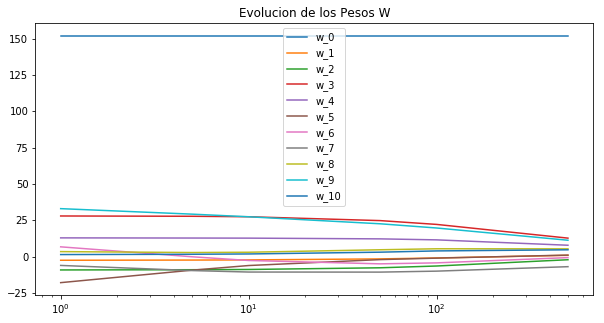

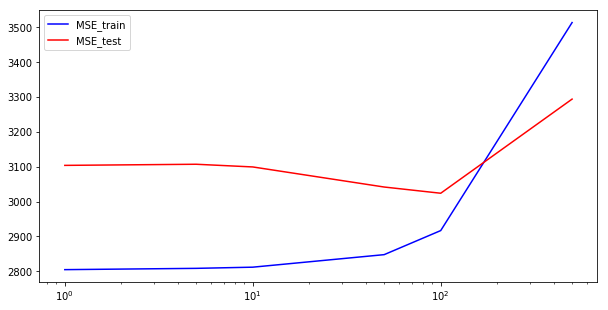

In [0]:
# probamos diferentes valores de lambda para el polinomio de grado 1 al que se ha llegado arriba
lambda_list = [1, 5, 10, 50, 100, 500]
deg = 1

# creamos las listas para guardar los datos
MSE_train_ = []
MSE_test_ = []
w_matrix_= []
 
# iteramos para los diferentes valores de lambda y cuardamos los resultados
for i,lamb in enumerate(lambda_list):
  w,mse_train,mse_test= learnPolyLR_L2(X_train, Y_train, X_test, Y_test, deg, lamb)
  MSE_train_.append(mse_train)
  MSE_test_.append(mse_test)
  w_matrix_.append(w)
  
# buscamos el minimo MSE
indice_minimo_MSE_train = MSE_train_.index(min(MSE_train_))
indice_minimo_MSE_test = MSE_test_.index(min(MSE_test_))

minimo_MSE_train = min(MSE_train_)
minimo_MSE_test = min(MSE_test_)

# pintamos
print("\n Los valores de la Test MSE para el modelo Ridge Regression L2: \n", MSE_test_)
print("\n El valor minimo de la funcion MSE para el modelo Ridge Regression L2 es de : ",minimo_MSE_test, " y es para un lambda de : \n ", lambda_list[indice_minimo_MSE_test])

print("\n Los valores de la Train MSE para el modelo Ridge Regression L2: \n", MSE_train_)
print("\n El valor minimo de la funcion MSE para el modelo Ridge Regression L2 es de : ",minimo_MSE_train, " y es para un lambda de : \n ", lambda_list[indice_minimo_MSE_train])

print("\n Los valores de la Test MSE para el modelo Ridge Regression L2: \n", MSE_test_)

plt.figure(figsize=(10,5))  
lines = plt.semilogx(lambda_list,w_matrix_) 
plt.legend(lines,('w_0','w_1','w_2','w_3','w_4','w_5','w_6','w_7','w_8','w_9','w_10'))
plt.title('Evolucion de los Pesos W')
    
plt.figure(figsize=(10,5))
plt.semilogx(lambda_list,MSE_train_,'b', label='MSE_train')
plt.semilogx(lambda_list,MSE_test_,'r', label='MSE_test')
plt.legend()
plt.show()



#### 2.2.1.2 Seleccion de los parametros optimos del modelo
Usaremos la validacion cruzada para seleccionar los parametros $\alpha$ y $D$ (grado del polinomio) que mejor se ajustan a nuestro modelo


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',Ridge())]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)
nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4], clf__alpha=[0.1, 1, 5, 10, 50, 100])
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='neg_mean_squared_error')
pipe_grid_search.fit(X_train, Y_train)
print(pipe_grid_search)

pipe_grid_search.predict(X_test)
MSE_test = np.mean((Y_test-f_test)**2)

print(MSE_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('normalize',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                             

Como podemos ver, definiendo un pipeline en el que le pasamos como prueba los siguientes parametros:


*   $D=[1,2,3,4,5]$
*   $\alpha = [0.1,1,5,10,50,100]$

El objeto **grid search** hace una validacion cruzada de los datos. Ejecuta cada posible valor del vector de $\alpha$ para cada uno de los diferentes grados $D$ del modelo polinomial. Si pintamos el objeto GridSearchCV(), lo que observamos es que los valores optimos que nos devuelve para la constante de regularizacion y el grado del polinomio son:

*   $D=2$
*   $\alpha = 1$

Para los que se obtiene un valor $MSE$ de 3097.1461383877945. Si hacemos una comparativa con los valores obtenidos con los modelos antes de la regularizacion:

*   Modelo = **KNN** valor de la $MSE=3294.70$ 
*   Modelo = **Regresion Lineal** valor de la $MSE=3097.1461383877945$ 
*   Modelo = **Regresion Polinomica** valor de la $MSE=3097.1461383877986$. Para un polinomio de grado $D=1$
* Modelo = **Regresion Polinomica (Ridge/L2)** valor de la $MSE=3097.1461383877945$. Para un polinomio de grado $D=2$ y $\alpha=1$

Se puede observar como conclusion general que aunque las diferencias el el valor $MSE$ con insignificantes (del orden de 4.092726157978177e-12), el modelo que mejor sigue prediciendo es el de la **regresion lineal**. Esto es debido a que observando el conjunto de caracteristicas (graficadas al principio del notebook), parece ser que debido a la naturaleza de los datos, se ajusta mejor un modelo lineal que uno polinomico debido a la distribucion que estos presentan.



###2.2.2 Lasso
El modelo Lasso computa los Least Absolute Shrinkage and Selection Operators. Es un modelo muy parecido al **Ridge** o **L2**, pero este es conocido como **Lasso** o **L1** y viene definido por:
$$\mathbf{w}_\lambda = \arg \min_{\mathbf{w}} \frac{1}{N} \left[\sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)})^2 + \lambda \sum_{j=1}^{D} | w_j|\right],$$

In [0]:
# Importamos Lasso de scickit learn y computamos la funcion para utilizarlo
from sklearn.linear_model import Lasso

def learnPolyLR_L1(X_train, Y_train, X_test, Y_test, n_degree, lamb):


  # Select id_feat and create polynomial version of training and test data
  Ntr = X_train.shape[0]
  Ntst = X_test.shape[0]

  # We are not using the columns of ones anymore
  polynomial_features = PolynomialFeatures(degree=n_degree, include_bias=False)
  
  X_train_pol = polynomial_features.fit_transform(X_train)
  X_test_pol = polynomial_features.transform(X_test)


  # Data normalization
  transformer = StandardScaler().fit(X_train_pol)  # fit() learns mean and std
 
  X_train_pol = transformer.transform(X_train_pol)
  X_test_pol =  transformer.transform(X_test_pol)

 
  # Compute Lasso Regression solution
  clf = Lasso(alpha=lamb, fit_intercept=True) # We add the intercept here (the columns of ones)
  clf.fit(X_train_pol, Y_train) 
  print(clf)
  # Save weight values
  w_star = np.zeros((X_train_pol.shape[1]+1,))
  w_star[0] = clf.intercept_
  w_star[1:] = clf.coef_
  
 
  # Evaluate train error
  f_tr = clf.predict(X_train_pol)
  MSE_train = np.mean((Y_train-f_tr)**2)
  
  
  # Evaluate test error
  f_test= clf.predict(X_test_pol)
  MSE_test = np.mean((Y_test-f_test)**2)

  return w_star, MSE_train, MSE_test

Ejecutamos el modelo con la regularizacion **Lasso** o **L1**, para diferentes valores de $\alpha$ y un polinomio $D=1$

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso(alp

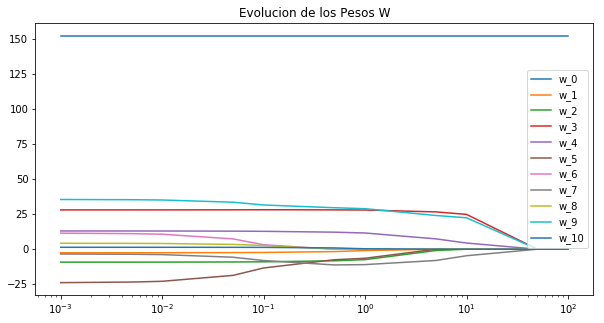

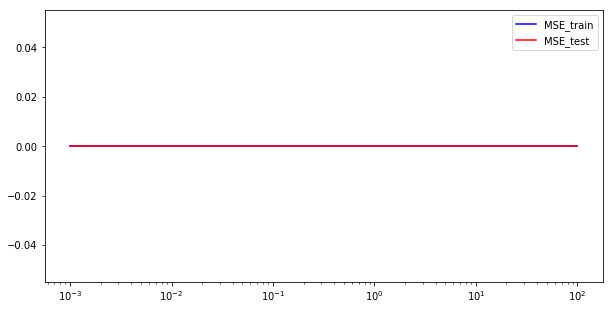

In [0]:
# ejecutamos el modelo lasso para diferentes valores de lambda y 
lambda_list = [0.001,0.005, 0.01,0.05,0.1, 0.5,1, 5, 10, 50, 100]
deg_list = 1
MSE_train = np.zeros((len(lambda_list),))
MSE_test = np.zeros((len(lambda_list),))
w_matrix=  np.zeros((len(lambda_list),deg+1)) 

# creamos las listas para guardar los datos
MSE_train_ = []
MSE_test_ = []
w_matrix_= []
 
# iteramos para los diferentes valores de lambda y cuardamos los resultados
#for i1,deg in enumerate(deg_list):
for i,lamb in enumerate(lambda_list):
  w,mse_train,mse_test= learnPolyLR_L1(X_train, Y_train, X_test, Y_test, deg, lamb)
  MSE_train_.append(mse_train)
  MSE_test_.append(mse_test)
  w_matrix_.append(w)

# buscamos el minimo MSE
indice_minimo_MSE_train = MSE_train_.index(min(MSE_train_))
indice_minimo_MSE_test = MSE_test_.index(min(MSE_test_))

minimo_MSE_train = min(MSE_train_)
minimo_MSE_test = min(MSE_test_)

# pintamos
print("\n Los valores de la Test MSE para el modelo Lasso L1: \n", MSE_test_)
print("\n El valor minimo de la funcion MSE para el modelo Lasso L1 es de : ",minimo_MSE_test, " y es para un lambda de : \n ", lambda_list[indice_minimo_MSE_test])

print("\n Los valores de la Train MSE para el modelo Ridge Regression L2: \n", MSE_train_)
print("\n El valor minimo de la funcion MSE para el modelo Ridge Regression L2 es de : ",minimo_MSE_train, " y es para un lambda de : \n ", lambda_list[indice_minimo_MSE_train])

print("\n Los valores de la Test MSE para el modelo Ridge Regression L2: \n", MSE_test_)

plt.figure(figsize=(10,5))  
lines = plt.semilogx(lambda_list,w_matrix_) 
plt.legend(lines,('w_0','w_1','w_2','w_3','w_4','w_5','w_6','w_7','w_8','w_9','w_10'))
plt.title('Evolucion de los Pesos W')

    
plt.figure(figsize=(10,5))
plt.semilogx(lambda_list,MSE_train,'b', label='MSE_train')
plt.semilogx(lambda_list,MSE_test,'r', label='MSE_test')
plt.legend()
plt.show()

#### 2.2.2.1 Evaluamos el modelo Lasso mediante CV


In [0]:
steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',Ridge())]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)
nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4], clf__alpha=[0.1, 1, 5, 10, 50, 100])
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='neg_mean_squared_error')
pipe_grid_search.fit(X_train, Y_train)
#rint(pipe_grid_search)

pipe_grid_search.predict(X_test)
MSE_test = np.mean((Y_test-f_test)**2)

print(MSE_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('normalize',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                             

In [0]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score


steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',Lasso())]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)
nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4], clf__alpha=[0.1, 1, 5, 10, 50, 100])
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='neg_mean_squared_error')
pipe_grid_search.fit(X_train, Y_train)
print(pipe_grid_search)

y_pred_lass = pipe_grid_search.predict(X_test)

print('Mejores Parametros: \n', pipe_grid_search.best_params_)

r2_score_pollass = r2_score(Y_test, y_pred_lass)

print('R2 score de Lasso: %.2f' % r2_score_pollass)

pipe_grid_search.predict(X_test)
MSE_test = np.mean((Y_test-f_test)**2)

print(MSE_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 560.5312989614322, tolerance: 157.3411368421053
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3861.4216530457197, tolerance: 157.3411368421053
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7851.035267389729, tolerance: 153.89354574898786
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8775.533469592

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('normalize',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
             

## Conclusiones

Como podemos observar, en el modelo $Lasso$, los parametros $\alpha$ y $D$ tienen el mismo valor que el el modelo $L2$. Obteniendo el siguiente resumen de conclusiones para los diferentes modelos empleados:

*   Modelo = **KNN** valor de la $MSE=3294.70$ 
*   Modelo = **Regresion Lineal** valor de la $MSE=3097.1461383877945$ 
*   Modelo = **Regresion Polinomica** valor de la $MSE=3097.1461383877986$. Para un polinomio de grado $D=1$
* Modelo = **Ridge Regression L2** valor de la $MSE=3097.1461383877945$. Para un polinomio de grado $D=2$ y $\alpha=1$
Modelo = **Lasso L1** valor de la $MSE=3097.1461383877945$. Para un polinomio de grado $D=2$ y $\alpha=1$

Como podemos observar, y ya se ha repetido en varias ocasiones, los valores de la $MSE$ con muy parecidos en todos los modelos, siendo el modelo $KNN$ el que con una diferencia del orden de $4.092726157978177e-12$ tiene una mejor precision  para predecir. 

Si nos centramos en el conjunto de datos, se puede observar que es un conjunto de datos relativamente pequeño y con un numero de variables no muy alto (10), de modo que en este tipo de conjuntos de datos (pequeños) y graficando las las variables como se ha hecho arriba. Se puede observar que funcionan mejor los modelos con un indice de sofisticacion menor.

Las variables $BMI$ y $S5$ por ejemplo, como se puede observar en la grafica, responden a un patron mas bien lineal. Otras variables como $age, S1,S2$ o $S6$ con mas bien una nube de puntos que no responde a ningun patros visual a priori. 

En cambio las variables $sex$ y $S4$ se podria decir a primera vista que responden a variables de tipo discreto, pudiendo observarse claramente diferentes grupos en sus graficas, con lo que un modelo $KNN$ con un valor de $K$ bajo, puede funcionar bien y no tender al sobre ajuste. Lo cual concuerda con los resultados obtenidos, ya que este modelo es el que mejor predice de los que se han probado.

## 3. Study of feature relevance and feature selection

In this last section, using different criteria, you have to analyze the relevance of the input features. Thus, you will have to find a subset with the $D'$ most relevant features and, using this subset of features, analyze the final performance of a regressor (for the sake of simplicity, consider a linear ridge regressor as final regressor).

To analyze the feature importances or relevances, you can use the following criteria:

1. **Relevance ranking based on the validation error**: if there were $D$ input features, we could try to train $D$ regressors where each regressor uses one (and only one) different input feature. According to the final perfomance of each regressor (evaluated on a validation set or with a CV proccess), we could rank the features (the most relevant feature is the one providing the lowest error). Using this ranking, we can select the $D'$ most relevant features as the $D'$ top-ranked ones. Note that this scheme only analyzes the isolated relevance of each feature to predict the output; so, it is said that this approach is *univariate*.

 <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/FeatureRanking.png" width="90%" > 


2. **Greedy search based on the validation error**: approach (1) has the disadvantage of not taking into account relationships between features. For instance, method (1) would not realize that two features can be rendundant or that a feature, that is useless by itself, can be very useful combined with another feature. To overcome this drawback, we should have to analyze subsets of features; however, exploring all possible subsets  is usually computationally unflexible (there are $2^D$ combinations!!!!); so a greedy search (fordward or backward) is usually prefered:

  2.1 *Fordward search*: It starts with an empty set and, iteratively, adds new features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Forward_search.png" width="48%" > 

  2.2 *Backward search*: It starts considering all the features and, iteratively, removes features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Backward_search.png" width="48%" > 

3. **Ridge linear regression with a prunning**: We know that the L2 regularization limits the magnitude of the weight vector to avoid overfitting problems, but these weigths do not become to null. However, in a linear model, *the weight magnitude can be an indicative of the feature relevance* and, unlike approach (1), all features are analyzed at the same time (*multivariate approach*). Use the weigth magnitude to generate a ranking of features and, later, use this ranking to select the $D'$ most relevant features.

4. **Lasso linear regression**: In this case, the L1 penalty allows us to directly eliminate some of the input features. Explore different values of the regularization parameter $\lambda$ to get a sequence of selected feature sets (from a single feature to all features).


5. **Elastic-net linear regression**: This last approach combines L1 and L2 regularizations, thus including the advantages of both methods. Varying adequately their regularization parameters, create a sequence of feature selection subsets. 



Final comments:

* Due to part of the feature selection process involves selecting the optimum number of features, to avoid additional complexity (having to validate this number), you can analyze the different methods by exploring the curves of MSE vs. number of selected features ($D'$).

* It is not necessary to apply all these methods to complete this notebook (you can choose, at least, three of them). In fact, the implementation of greedy search approaches require an advanced knowledge of Python; so take this into account when you design your notebook solution.

* **Please, analyze in detail the different results, pointing out the advantages/disadvantages of each feature selection scheme**. Think about the behaviour of the different criteria in cases where a feature is irrelevant or there are redundant features. Additional experiments helping you to support any of your conclusions will be welcome.

## Seleccion de Caracteristicas
Hay que buscar un subconjunto $D'$ con las caracteristicas mas significativas.

Una vez seleccionadas, analizaremos el comportamiento del ultimo modelo que se ha hecho (linear ridge regressor)

Criterio a seguir:




1. **Relevance ranking based on the validation error**: Para un numero $D$ de caracteristicas hay que entrenar $D$ regresores, cada uno con una caracteristica. En funcion del resultado $MSE$ de cada regresor podemos hacer un ranking y extraer el subconjunto $D'$. A este enfoque se le llama **univariate** debido a que analiza la relevancia de las caracteristicas de manera aislada

In [0]:
# vuelvo a cargar los datos, ya que he machacado alguna variable a lo largo del notebook

# cargamos los datos de salida
Y = diabetes.target

# cargamos los nombres de las caracteristicas
feature_names = diabetes.feature_names

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [0]:
# probamos diferentes valores de lambda para el polinomio de grado 1 al que se ha llegado arriba
lambda_list = [1, 5, 10, 50, 100, 500]
deg = 1

# creamos las listas para guardar los datos
MSE_train_ = []
MSE_test_ = []
w_matrix_= []

for d in range (D):
      
  X_trainByFeature = X_train[:, d][:,np.newaxis]
  X_testByFeature = X_test[:, d][:,np.newaxis]
  
  w,mse_train,mse_test= learnPolyLR_L2(X_trainByFeature, Y_train, X_testByFeature, Y_test, 2, 1)
  
  MSE_train_.append(mse_train)
  MSE_test_.append(mse_test)
  w_matrix_.append(w)

indice_minimo_MSE_train = MSE_train_.index(min(MSE_train_))
indice_minimo_MSE_test = MSE_test_.index(min(MSE_test_))

minimo_MSE_train = min(MSE_train_)
minimo_MSE_test = min(MSE_test_)
print("MSE Train: ",MSE_train_)
print("MSE test: ",MSE_test_)



Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
   

2. **Lasso Linear Regression**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433236.98800736805, tolerance: 194.25105695792882
  positive)
No handles with labels found to put in legend.



Ranking del peso que tiene cada caracteristica: 
[('age', -52.46990772789579), ('sex', -193.51064548795148), ('bmi', 579.4827762692265), ('bp', 272.46404224003703), ('s1', -504.72400540271116), ('s2', 241.68441227458132), ('s3', -69.7361916524071), ('s4', 86.62018318299968), ('s5', 721.9557992303526), ('s6', 26.77887028447498)] 
 Valor de la MSE = 3097.146138995673 para D=1 alpha= 0

Ranking del peso que tiene cada caracteristica: 
[('age', -52.4607196474169), ('sex', -193.5000603464955), ('bmi', 579.4881364312466), ('bp', 272.4525982538946), ('s1', -504.2561049062422), ('s2', 241.31740097665988), ('s3', -69.94077893180594), ('s4', 86.5511174018141), ('s5', 721.7865382681716), ('s6', 26.776193784416506)] 
 Valor de la MSE = 3097.1792051948432 para D=1 alpha= 1e-05

Ranking del peso que tiene cada caracteristica: 
[('age', -51.551151952772145), ('sex', -192.45220304156882), ('bmi', 580.0186582282593), ('bp', 271.31984178599936), ('s1', -457.9505538437595), ('s2', 204.99603013464125), (

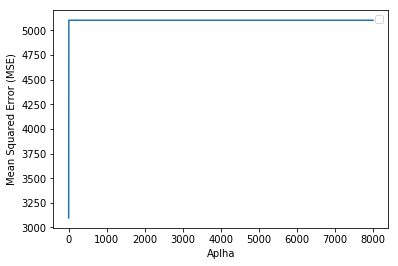

In [156]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

alpha_ = [0, 0.00001, 0.001, 0.1, 1, 5, 10, 50, 100, 150, 300, 500, 1000, 2000, 4000, 8000]
MSE = []
for alpha in alpha_:

  clf = linear_model.Lasso(alpha=alpha)
  clf.fit(X_train, Y_train)

  Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
     normalize=False, positive=False, precompute=False, random_state=None,
     selection='cyclic', tol=0.0001, warm_start=False)

  Y_pred=clf.predict(X_test)
 
  coef_ = clf.coef_.tolist()
  coef_ = list(zip(feature_names,coef_))
  
  MSE.append(mean_squared_error(Y_test, Y_pred))
  
  print(f"\nRanking del peso que tiene cada caracteristica: \n{coef_} ")
  print(f" Valor de la MSE = {mean_squared_error(Y_test, Y_pred)} para D={1} alpha= {alpha}")

plt.figure()
plt.plot(alpha_,MSE)
plt.xlabel('Aplha')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


3. **Ridge Linear Regression**

No handles with labels found to put in legend.



Ranking del peso que tiene cada caracteristica: 
[('age', -52.46990775406243), ('sex', -193.5106455238427), ('bmi', 579.4827762020263), ('bp', 272.4640423392318), ('s1', -504.72401371145367), ('s2', 241.68441865585777), ('s3', -69.73618782900195), ('s4', 86.62018451049678), ('s5', 721.9558022182563), ('s6', 26.778870275788332)] 
 Valor de la MSE = 3097.1461383877977 para D=1 alpha= 0

Ranking del peso que tiene cada caracteristica: 
[('age', -52.464304210961004), ('sex', -193.50427241713368), ('bmi', 579.4844212676198), ('bp', 272.454890899479), ('s1', -503.9704016818243), ('s2', 241.0934499995644), ('s3', -70.07056004590677), ('s4', 86.51977787923325), ('s5', 721.6694040610845), ('s6', 26.785213707006275)] 
 Valor de la MSE = 3097.1877249724294 para D=1 alpha= 1e-05

Ranking del peso que tiene cada caracteristica: 
[('age', -51.961302412530046), ('sex', -192.9211492958794), ('bmi', 579.5371603791202), ('bp', 271.66606120344267), ('s1', -439.6164820608441), ('s2', 190.5793781784382), 

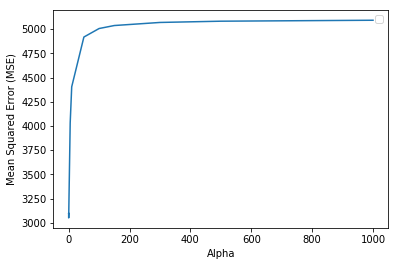

In [155]:

MSE=[]

for alpha in alpha_:

  clf = linear_model.Ridge(alpha=alpha)
  clf.fit(X_train, Y_train)

  Y_pred=clf.predict(X_test)
 
  MSE.append(mean_squared_error(Y_test, Y_pred))

  coef_ = clf.coef_.tolist()
  coef_ = list(zip(feature_names,coef_))  
  print(f"\nRanking del peso que tiene cada caracteristica: \n{coef_} ")
  print(f" Valor de la MSE = {mean_squared_error(Y_test, Y_pred)} para D={1} alpha= {alpha}")


plt.figure()
plt.plot(alpha_,MSE)
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

4. **Elastic-net linear regression**

In [146]:
from sklearn.linear_model import ElasticNet


regr = ElasticNet(random_state=0)
regr.fit(X_train, Y_train)  

ElasticNet(alpha=alpha, copy_X=True, fit_intercept=True, l1_ratio=0.5, max_iter=1000, normalize=False, 
           positive=False, precompute=False,random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

Y_pred=clf.predict(X_test)
 
coef_ = clf.coef_.tolist()
coef_ = list(zip(feature_names,coef_))  


print(f"\nRanking del peso que tiene cada caracteristica: \n{coef_} ")
print(f" Valor de la MSE = {mean_squared_error(Y_test, Y_pred)}")





Ranking del peso que tiene cada caracteristica: 
[('age', 2.074990245908927), ('sex', 0.5939558736839944), ('bmi', 7.151100440181158), ('bp', 5.237411683598377), ('s1', 2.6714455324656106), ('s2', 2.081586883915622), ('s3', -4.883230785510158), ('s4', 5.239638088830675), ('s5', 7.080608243755352), ('s6', 4.757483504066262)] 
 Valor de la MSE = 5006.1057550515425


#### Resultado
A continuacion se hace la comparativa para el error MSE y el ranking de caracteristicas en funcion de los diferentes modelos implementados:
* **Relevance Ranking**:
Los valores minimos de la $MSE$ se obtienen con las caracteristicas numero tres y numero nueve, que hacen referencia a las variables $BMI$ y $S5$ del conjunto de datos. La medicion $MSE$ devuelve unos valores de $3892.7409455692623$ y $4000.143168404639$ respectivamente para $MSE_{train}$ y unos valores de  $3918.415314134182$ y $4111.058521683867$ para $MSE_{test}$

*   **Lasso**: Ranking del peso que tiene cada caracteristica: 
[('age', 0.0), ('sex', 0.0), ('bmi', 407.6964692937694), ('bp', 0.0), ('s1', 0.0), ('s2', 0.0), ('s3', -0.0), ('s4', 0.0), ('s5', 371.1097884556441), ('s6', 0.0)] 
 Valor de la $MSE = 3541.5657458363808$ para $D=1$ $alpha= 1$


*   **Ridge Regression**: Ranking del peso que tiene cada caracteristica: 
[('age', -51.961302412530046), ('sex', -192.9211492958794), ('bmi', 579.5371603791202), ('bp', 271.66606120344267), ('s1', -439.6164820608441), ('s2', 190.5793781784382), ('s3', -98.45947777007164), ('s4', 78.19666715298489), ('s5', 697.0459830780858), ('s6', 27.374629483729446)] 
 Valor de la $MSE = 3100.691494660027$ para $D=1$ $alpha= 0.001$. 


* **Elastic Network**: Ranking del peso que tiene cada caracteristica: 
[('age', 2.074990245908927), ('sex', 0.5939558736839944), ('bmi', 7.151100440181158), ('bp', 5.237411683598377), ('s1', 2.6714455324656106), ('s2', 2.081586883915622), ('s3', -4.883230785510158), ('s4', 5.239638088830675), ('s5', 7.080608243755352), ('s6', 4.757483504066262)] 
 Valor de la $MSE = 5006.1057550515425$


Las caracteristicas mas importantes para todos los modelos, siempre son las mismas $BMI$ y $s5$
